### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


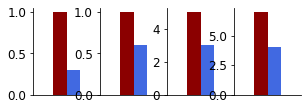

In [4]:
warmcol = 'darkred'; ozcol = 'royalblue'; tw = 1; marg = 1.5
windWarm = 1; windOz = 0.3
sstWarm = 1; sstOz = 0.6
otWarm = 7; otOz = 4
mldWarm = 5; mldOz = 3

fact = 0.4
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].bar(1,windWarm, color = warmcol, width = tw)
axs[0].bar(2,windOz, color = ozcol, width = tw)
axs[1].bar(1,sstWarm, color = warmcol, width = tw)
axs[1].bar(2,sstOz, color = ozcol, width = tw)
axs[2].bar(1,mldWarm, color = warmcol, width = tw)
axs[2].bar(2,mldOz, color = ozcol, width = tw)
axs[3].bar(1,otWarm, color = warmcol, width = tw)
axs[3].bar(2,otOz, color = ozcol, width = tw)


# axs[0].spines['bottom'].set_visible(False)
# axs[0].spines['left'].set_visible(False)


for i in range(0,4):
    axs[i].set_xlim([1-(tw/2)-marg,2+(tw/2)+marg])
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xticks([])
    
plt.subplots_adjust(hspace = 0.0, wspace = 0.0)

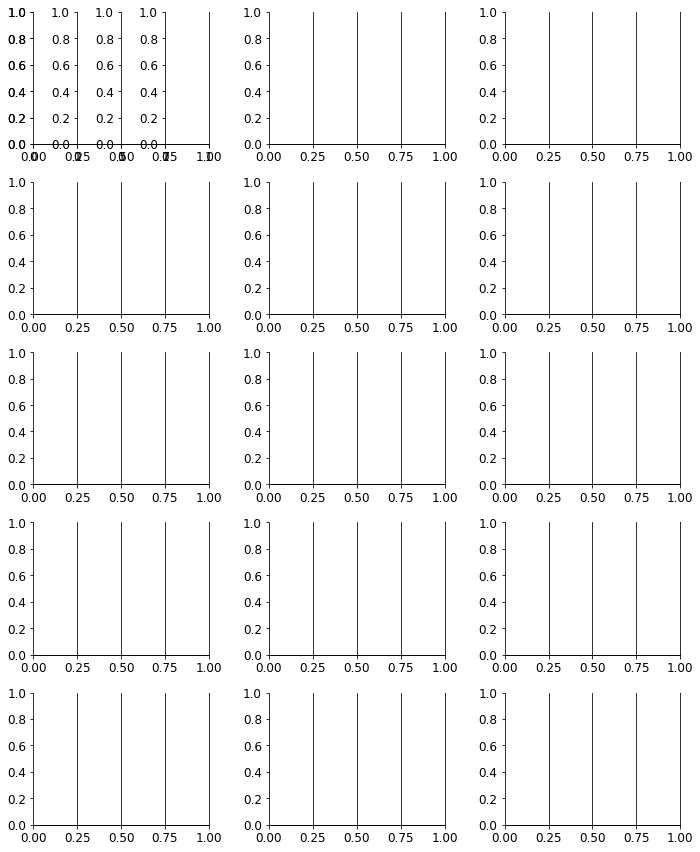

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create the main figure
fig = plt.figure(figsize=(10, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig)

# Loop to create each of the 4 main subplots
for i in range(15):
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    #inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i])
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.0)

    #inner_grid.subplots_adjust(wspace=0.0)
    
#     axs[0].bar(1,windWarm, color = warmcol, width = tw)
#     axs[0].bar(2,windOz, color = ozcol, width = tw)
#     axs[1].bar(1,sstWarm, color = warmcol, width = tw)
#     axs[1].bar(2,sstOz, color = ozcol, width = tw)
#     axs[2].bar(1,mldWarm, color = warmcol, width = tw)
#     axs[2].bar(2,mldOz, color = ozcol, width = tw)
#     axs[3].bar(1,otWarm, color = warmcol, width = tw)
#     axs[3].bar(2,otOz, color = ozcol, width = tw)
#     # Loop to create each of the 3 nested subplots
    for j in range(4):
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
    
        if i>0:
            inner_ax.set_yticks([])
            inner_ax.set_xticks([])
        # Plot your data here
        # Example: inner_ax.plot([1, 2, 3], [1, 2, 3])

        # Optional: Customize inner_ax (e.g., set labels, titles, etc.)

    # Optional: Customize outer_ax (e.g., set titles)

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
#savenam = 'test2.nc'
#'period', 'season', 'quantity', 'forcing'
datar = np.zeros([3,5,4,2])
datar[2,1,1,0] = 2
datar[0,0,3,1] = 3
datar[0,0,0,0] = 6
datar[0,0,0,1] = 7
data_vars = {'trend':(['period', 'season', 'quantity', 'forcing'], datar,
{'units': '/yr',
'long_name':''}),
}
# define coordinates
coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
          'season': (['season'], ['fy','djf','mam','jja','son']),
          'quantity': (['quantity'], ['wind','sst','mld','ot']),
          'forcing': (['forcing'], ['ghg','ozone']),
          
         }
attrs = {'made in':'SOZONE/windAnalyis/oceanFields/synthesisFigure.ipynb',
'desc': 'yearly medusa files, saving only variables of interest'
}
ds = xr.Dataset(data_vars=data_vars,
coords=coords,
attrs=attrs)

#ds.sel(period='1950-2000', season='fy', quantity = 'sst', forcing = 'ghg').data = 10
ds.trend.loc[{'period':'1950-2000', 'season':'fy', 'quantity':'sst', 'forcing' : 'ghg'}] = 10

# ds.to_netcdf(savenam)

val = ds.sel(period = '1950-2000', season = 'fy', quantity = 'sst', forcing = 'ghg')
print(val.trend.values)

10.0


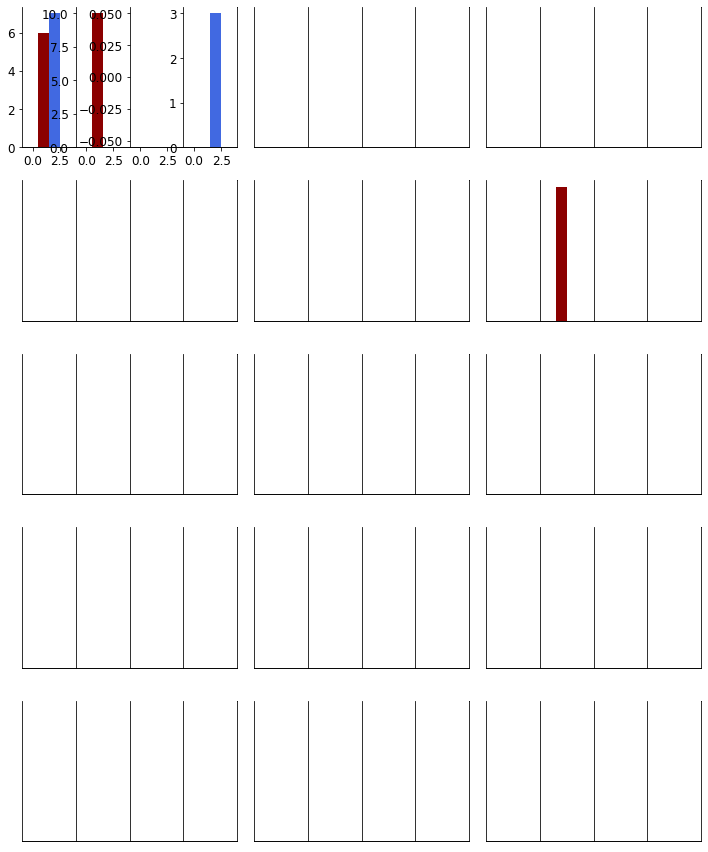

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
warmcol = 'darkred'; ozcol = 'royalblue'; tw = 1; marg = 1.5

# Create the main figure
fig = plt.figure(figsize=(10, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['fy','fy','fy',\
            'djf','djf','djf',\
            'mam', 'mam', 'mam',\
            'jja','jja','jja',\
            'son','son','son']
quantityar = ['wind','sst','mld','ot']
quantmins = []

# Loop to create each of the 4 main subplots
for i in range(15):
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.0)

    
    for j in range(4):
        tquantity = quantityar[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgval = ds.trend.sel(period = tperiod, season = tseas, quantity = tquantity, forcing = 'ghg').values
        ozoneval = ds.trend.sel(period = tperiod, season = tseas, quantity = tquantity, forcing = 'ozone').values
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg, {ghgval}')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone, {ozoneval}')
            
        inner_ax.bar(1,ghgval, color = warmcol, width = tw)
        inner_ax.bar(2,ozoneval, color = ozcol, width = tw)        
        inner_ax.set_xlim([1-(tw/2)-marg,2+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
#         inner_ax.set_xticks([])
    
    
        if i>0:
            inner_ax.set_yticks([])
            inner_ax.set_xticks([])
    

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['fy','fy','fy',\
            'djf','djf','djf',\
            'mam', 'mam', 'mam',\
            'jja','jja','jja',\
            'son','son','son']

# Loop to create each of the 4 main subplots
for i in range(15):
    
    print(i)
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    print(tseas)
    print(f'{tperiod}, {tseas}')
    print()

0
fy
1950-2000, fy

1
fy
2000-2050, fy

2
fy
2050-2100, fy

3
djf
1950-2000, djf

4
djf
2000-2050, djf

5
djf
2050-2100, djf

6
mam
1950-2000, mam

7
mam
2000-2050, mam

8
mam
2050-2100, mam

9
jja
1950-2000, jja

10
jja
2000-2050, jja

11
jja
2050-2100, jja

12
son
1950-2000, son

13
son
2000-2050, son

14
son
2050-2100, son



## put trends into one dataset

In [9]:
collate = False
if collate:
    
    tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary'
    wspd_t = xr.open_dataset(f'{tdir}/wspd-medusa-50yrtrends.nc')
    ot_t = xr.open_dataset(f'{tdir}/ot-medusa-50yrtrends.nc')
    sst_t = xr.open_dataset(f'{tdir}/sst-medusa-50yrtrends.nc')
    mld_t = xr.open_dataset(f'{tdir}/mld-medusa-50yrtrends.nc')

    datar = np.zeros([3,5,4,2,2])

    data_vars = {'trend':(['period', 'season', 'quantity', 'forcing','scenario'], datar,
    {'units': '/yr',
    'long_name':''}),
    }
    # define coordinates
    coords = {'period': (['period'], ['1950-2000','2000-2050','2050-2100']),
              'season': (['season'], ['FY','DJF','MAM','JJA','SON']),
              'quantity': (['quantity'], ['wind','sst','mld','ot']),
              'forcing': (['forcing'], ['ghg','ozone']),
              'scenario': (['scenario'], ['ssp1','ssp3']),

             }
    attrs = {'made in':'SOZONE/windAnalyis/oceanFields/synthesisFigure.ipynb',
    'desc': 'yearly medusa files, saving only variables of interest'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)


    periodar =  ['1950-2000','2000-2050','2050-2100']
    seasonar = ['FY','DJF','MAM','JJA','SON']
    quantityar = ['wind','sst','mld','ot']
    quantityh = [wspd_t, sst_t, mld_t, ot_t]
    forcingar = ['ghg','ozone']
    scenarioar = ['ssp1','ssp3']

    ind = 0
    for q in quantityar:
        tds = quantityh[ind]

        for p in periodar:
            for se in seasonar:

                for f in forcingar:
                    for sc in scenarioar:

                        tval = tds.trend.loc[{'period':p, 'season':se,\
                                              'forcing': f, 'scenario': sc }].values
                        print(f'period {p}, season {se}, quantity {q}, forcing {f}, scenario {sc}: {tval}')
                        ds.trend.loc[{'period':p, 'season':se, 'quantity': q, \
                                              'forcing': f, 'scenario': sc }] = tval
        ind = ind + 1

    ds.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/all-medusa-50yrtrends.nc')

#ds.trend.loc[{'period':tper, 'season':tseas, 'forcing' : tforc, 'quantity': tquant, 'scenario' : tscen}] 

In [10]:
ds = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/all-medusa-50yrtrends.nc')
print(ds)

<xarray.Dataset>
Dimensions:   (forcing: 2, period: 3, quantity: 4, scenario: 2, season: 5)
Coordinates:
  * period    (period) object '1950-2000' '2000-2050' '2050-2100'
  * season    (season) object 'FY' 'DJF' 'MAM' 'JJA' 'SON'
  * quantity  (quantity) object 'wind' 'sst' 'mld' 'ot'
  * forcing   (forcing) object 'ghg' 'ozone'
  * scenario  (scenario) object 'ssp1' 'ssp3'
Data variables:
    trend     (period, season, quantity, forcing, scenario) float64 ...
Attributes:
    made in:  SOZONE/windAnalyis/oceanFields/synthesisFigure.ipynb
    desc:     yearly medusa files, saving only variables of interest


findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo


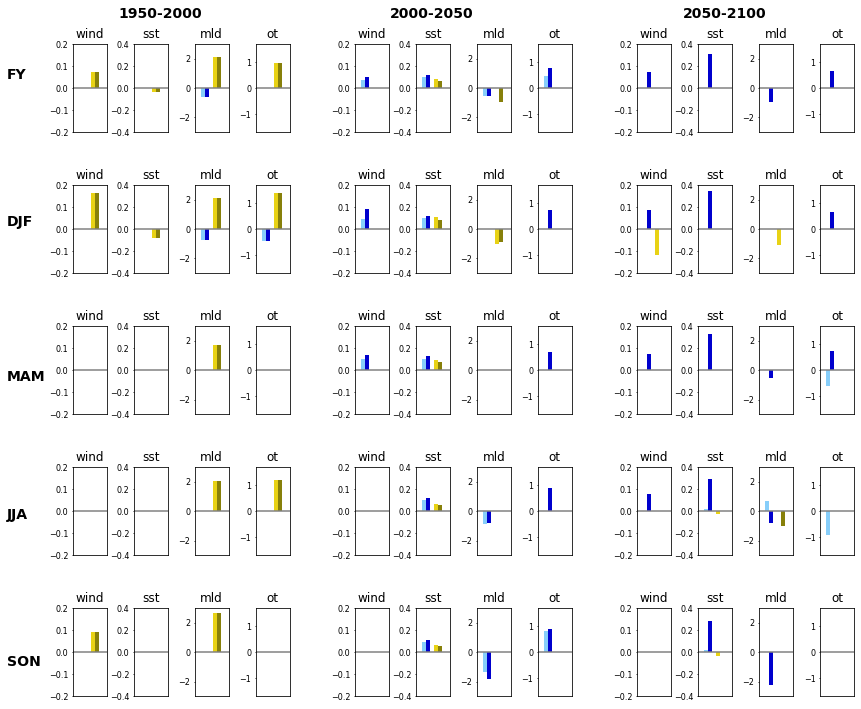

In [11]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1; marg = 1.5
warmssp1col = 'lightskyblue' #'lightgrey'
warmssp3col = 'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(14, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig, wspace=0.3, hspace = 0.6)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantmins = [-0.2,-0.4,-3,-1.7]
quantmaxs = [0.2,0.4,3,1.7]

# Loop to create each of the 4 main subplots
for i in range(15):
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values
#         if verbose:
#             print(f'{tperiod}, {tseas}, {tquantity}, ghg, {ghgval}')
#             print(f'{tperiod}, {tseas}, {tquantity}, ozone, {ozoneval}')
            
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw)
        inner_ax.bar(2,ghgvalssp3, color = warmssp3col, width = tw)
        inner_ax.bar(4,ozonevalssp1, color = ozssp1col, width = tw)
        inner_ax.bar(5,ozonevalssp3, color = ozssp3col, width = tw)  
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,5.5+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(True)
        inner_ax.spines['bottom'].set_visible(True)
        inner_ax.spines['right'].set_visible(True)
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.set_title(tquantity, fontsize = 12, fontweight = 'normal')
        inner_ax.tick_params(labelsize = 8, length = 1)
    
    
#         if i>0:
#             inner_ax.set_yticks([])
#             inner_ax.set_xticks([])
    
fig.text(y = 0.91, x = 0.17, s = '1950-2000', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.06
fig.text(x = tle, y = 0.84, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.67, s ='DJF', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.49, s ='MAM', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.33, s ='JJA', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.16, s ='SON', fontsize = 14, fontweight = 'bold')

#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()
plt.show()

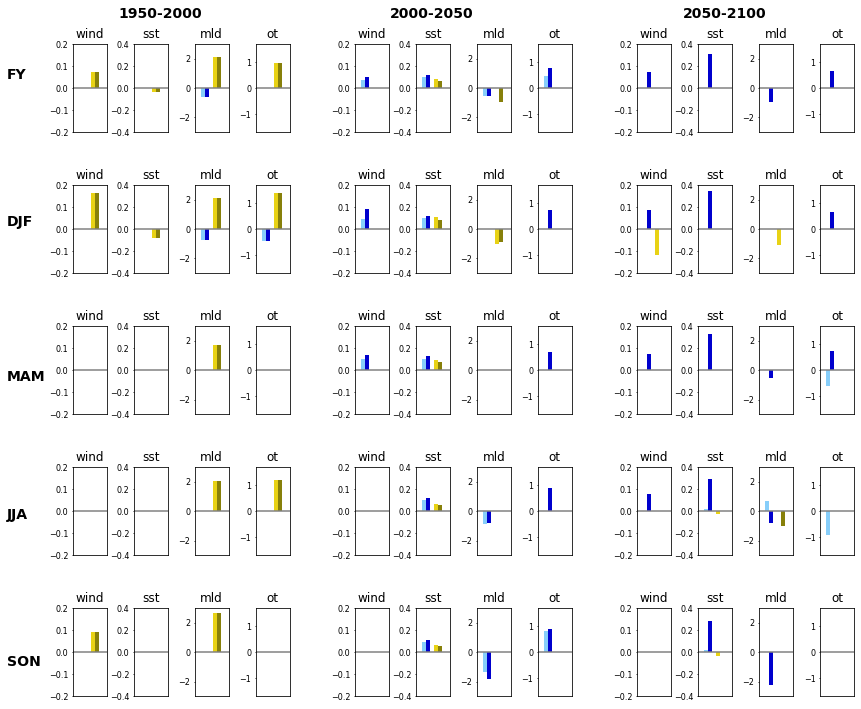

In [12]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = False
tw = 1; marg = 1.5
warmssp1col = 'lightskyblue' #'lightgrey'
warmssp3col = 'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(14, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig, wspace=0.3, hspace = 0.6)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantmins = [-0.2,-0.4,-3,-1.7]
quantmaxs = [0.2,0.4,3,1.7]

# Loop to create each of the 4 main subplots
for i in range(15):
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values
#         if verbose:
#             print(f'{tperiod}, {tseas}, {tquantity}, ghg, {ghgval}')
#             print(f'{tperiod}, {tseas}, {tquantity}, ozone, {ozoneval}')
            
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw)
        inner_ax.bar(2,ghgvalssp3, color = warmssp3col, width = tw)
        inner_ax.bar(4,ozonevalssp1, color = ozssp1col, width = tw)
        inner_ax.bar(5,ozonevalssp3, color = ozssp3col, width = tw)  
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,5.5+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(True)
        inner_ax.spines['bottom'].set_visible(True)
        inner_ax.spines['right'].set_visible(True)
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.set_title(tquantity, fontsize = 12, fontweight = 'normal')
        inner_ax.tick_params(labelsize = 8, length = 1)
    
    
#         if i>0:
#             inner_ax.set_yticks([])
#             inner_ax.set_xticks([])
    
fig.text(y = 0.91, x = 0.17, s = '1950-2000', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.06
fig.text(x = tle, y = 0.84, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.67, s ='DJF', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.49, s ='MAM', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.33, s ='JJA', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.16, s ='SON', fontsize = 14, fontweight = 'bold')

#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
plt.tight_layout()
plt.show()

## per 50 yrs


1950-2000, FY
1950-2000, FY, wind, ghg, nan
1950-2000, FY, wind, ghg, nan
1950-2000, FY, wind, ozone, 0.3649321601631714
1950-2000, FY, wind, ozone, 0.3649321601631714
1950-2000, FY, sst, ghg, nan
1950-2000, FY, sst, ghg, nan
1950-2000, FY, sst, ozone, -0.17972539061969584
1950-2000, FY, sst, ozone, -0.17972539061969584
1950-2000, FY, mld, ghg, -3.201252840678581
1950-2000, FY, mld, ghg, -3.201252840678581
1950-2000, FY, mld, ozone, 10.681452842057922
1950-2000, FY, mld, ozone, 10.681452842057922
1950-2000, FY, ot, ghg, nan
1950-2000, FY, ot, ghg, nan
1950-2000, FY, ot, ozone, 4.753478020974628
1950-2000, FY, ot, ozone, 4.753478020974628

2000-2050, FY
2000-2050, FY, wind, ghg, 0.17904110249874755
2000-2050, FY, wind, ghg, 0.25927255793098614
2000-2050, FY, wind, ozone, nan
2000-2050, FY, wind, ozone, nan
2000-2050, FY, sst, ghg, 0.49300385877333197
2000-2050, FY, sst, ghg, 0.5908172581465344
2000-2050, FY, sst, ozone, 0.4194203451621497
2000-2050, FY, sst, ozone, 0.33901222202766224


2050-2100, SON, mld, ghg, nan
2050-2100, SON, mld, ghg, -11.219403227327414
2050-2100, SON, mld, ozone, nan
2050-2100, SON, mld, ozone, nan
2050-2100, SON, ot, ghg, nan
2050-2100, SON, ot, ghg, nan
2050-2100, SON, ot, ozone, nan
2050-2100, SON, ot, ozone, nan


findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo


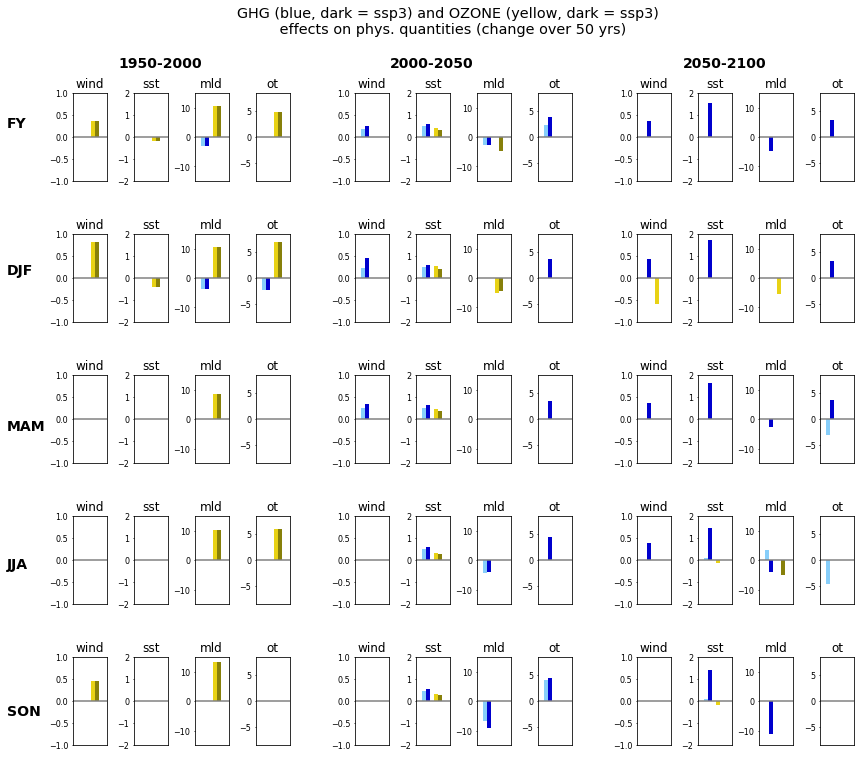

In [18]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['font.family'] = 'monospace'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
verbose = True
tw = 1; marg = 1.5
warmssp1col = 'lightskyblue' #'lightgrey'
warmssp3col = 'mediumblue' #'dimgrey'
ozssp1col = '#E8D215'
ozssp3col = '#87800A'


# Create the main figure
fig = plt.figure(figsize=(14, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig, wspace=0.3, hspace = 0.6)

periodar = ['1950-2000','2000-2050','2050-2100']
seasonar = ['FY','FY','FY',\
            'DJF','DJF','DJF',\
            'MAM', 'MAM', 'MAM',\
            'JJA','JJA','JJA',\
            'SON','SON','SON']
quantityar = ['wind','sst','mld','ot']
quantmins = [-0.2*5,-0.4*5,-3*5,-1.7*5]
quantmaxs = [0.2*5,0.4*5,3*5,1.7*5]

# Loop to create each of the 4 main subplots
for i in range(15):
    
    per = i%3
    tperiod = periodar[per]
    tseas = seasonar[i]
    if verbose:
        print('')
        print(f'{tperiod}, {tseas}')
    
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)
    outer_ax.set_yticks([])
    outer_ax.set_xticks([])
    outer_ax.spines['right'].set_visible(False)
    outer_ax.spines['bottom'].set_visible(False)
    outer_ax.spines['top'].set_visible(False)
    outer_ax.spines['left'].set_visible(False)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.8)

    
    for j in range(4):
        tquantity = quantityar[j]
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
        ghgvalssp1 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp1').values * 5 #per 50yr
        ozonevalssp1 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp1').values * 5
        ghgvalssp3 = ds.trend.sel(period = tperiod, season = tseas, \
                                  quantity = tquantity, forcing = 'ghg', scenario = 'ssp3').values * 5
        ozonevalssp3 = ds.trend.sel(period = tperiod, season = tseas,\
                                    quantity = tquantity, forcing = 'ozone', scenario = 'ssp3').values * 5
        if verbose:
            print(f'{tperiod}, {tseas}, {tquantity}, ghg, {ghgvalssp1}')
            print(f'{tperiod}, {tseas}, {tquantity}, ghg, {ghgvalssp3}')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone, {ozonevalssp1}')
            print(f'{tperiod}, {tseas}, {tquantity}, ozone, {ozonevalssp3}')
            
        inner_ax.bar(1,ghgvalssp1, color = warmssp1col, width = tw)
        inner_ax.bar(2,ghgvalssp3, color = warmssp3col, width = tw)
        inner_ax.bar(4,ozonevalssp1, color = ozssp1col, width = tw)
        inner_ax.bar(5,ozonevalssp3, color = ozssp3col, width = tw)  
        inner_ax.set_ylim([quantmins[j],quantmaxs[j]])
        inner_ax.set_xlim([1-(tw/2)-marg,5.5+(tw/2)+marg])
        inner_ax.spines['top'].set_visible(True)
        inner_ax.spines['bottom'].set_visible(True)
        inner_ax.spines['right'].set_visible(True)
        inner_ax.axhline(y=0, color = 'grey')
        inner_ax.set_xticks([])
        inner_ax.set_title(tquantity, fontsize = 12, fontweight = 'normal')
        inner_ax.tick_params(labelsize = 8, length = 1)
    
    
#         if i>0:
#             inner_ax.set_yticks([])
#             inner_ax.set_xticks([])
    
fig.text(y = 0.91, x = 0.17, s = '1950-2000', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.27, s = '2000-2050', fontsize = 14, fontweight = 'bold')
fig.text(y = 0.91, x = 0.17+.56, s = '2050-2100', fontsize = 14, fontweight = 'bold')
tle = 0.06
fig.text(x = tle, y = 0.84, s ='FY', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.67, s ='DJF', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.49, s ='MAM', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.33, s ='JJA', fontsize = 14, fontweight = 'bold')
fig.text(x = tle, y = 0.16, s ='SON', fontsize = 14, fontweight = 'bold')

#fig.text(y = 1.1, x = 0.17, s = '2000-2050', fontsize = 16, fontweight = 'bold')
# Adjust layout
fig.suptitle('GHG (blue, dark = ssp3) and OZONE (yellow, dark = ssp3) \n effects on phys. quantities (change over 50 yrs)')
plt.tight_layout()
plt.show()

findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Menlo


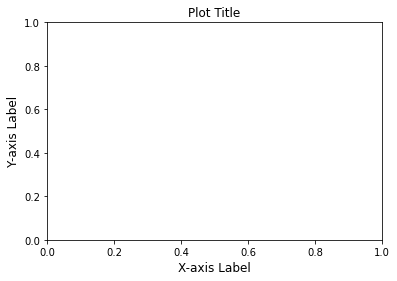

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Set the font to Gill Sans
gill_sans_font = font_manager.FontProperties(family='Gill Sans', size=12)

# Example for a single subplot
fig, ax = plt.subplots()

# Set font for different plot elements
ax.set_title('Plot Title', fontproperties=gill_sans_font)
ax.set_xlabel('X-axis Label', fontproperties=gill_sans_font)
ax.set_ylabel('Y-axis Label', fontproperties=gill_sans_font)
ax.tick_params(axis='both', labelsize=10)  # Adjust the label size as needed

# If you want to set the font for all texts in the plot
for text in ax.texts:
    text.set_fontproperties(gill_sans_font)

# Your plotting code here

plt.show()